<a href="https://colab.research.google.com/github/Saeed2761989/heart-dataset/blob/main/W25_I01_Entropy_Gini_Saeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image

In [ ]:
random_state = 30

In [ ]:
heartData = pd.read_csv("https://raw.githubusercontent.com/Saeed2761989/heart-dataset/refs/heads/main/heart.csv")


In [ ]:
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heartData.shape

(1025, 14)

In [ ]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Cleaning Data

In [ ]:
heartData.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
heartData.columns = heartData.columns.str.strip()

In [ ]:
display(heartData.isnull().sum())

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heartData.dropna(inplace=True)

In [ ]:
heartData['sex'] = heartData['sex'].replace({"Male": 0, "Female": 1})


In [ ]:
heartData['sex'].unique()

array([1, 0])

In [ ]:
heartData['target'].unique()

array([0, 1])

In [ ]:
heartData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
heartData["target"]=heartData["target"].replace(1.0,"defect")
heartData["target"]=heartData["target"].replace(0.0,"normal")
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [ ]:
NOPediction= heartData.dropna()
NOPediction["target"].describe()

,target
count,1025
unique,2
top,defect
freq,526


In [ ]:
NOPediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


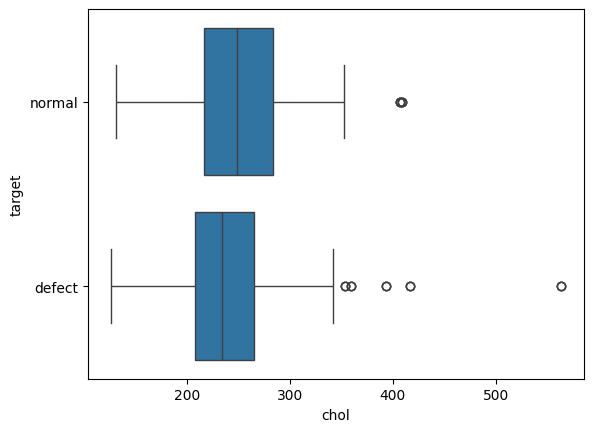

In [ ]:
sns.boxplot(y="target",x="chol",data=NOPediction)
plt.show()

<Axes: xlabel='chol', ylabel='age'>

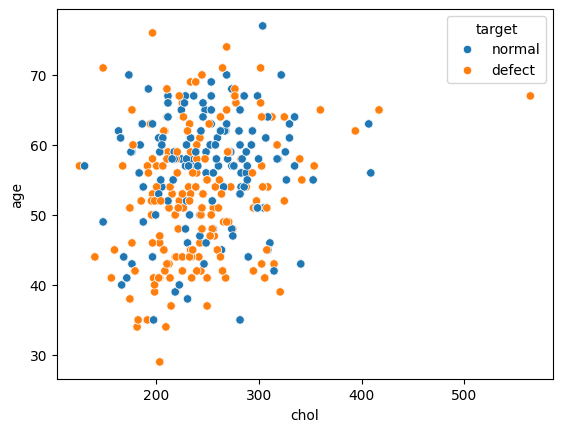

In [169]:
sns.scatterplot(y="age",x="chol",hue="target",data=NOPediction)

In [ ]:
x = heartData.drop(columns=["target"])
y = heartData['target']

In [ ]:
x.shape

(1025, 13)

In [ ]:
y.shape

(1025,)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=random_state)

In [ ]:
train_x.shape

(820, 13)

In [ ]:
test_x.shape

(205, 13)

In [ ]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=random_state)
entr_model.fit(train_x, train_y)
y_pred = entr_model.predict(test_x)
y_pred = pd.Series(y_pred)

In [ ]:
print("Model Entropy - max depth 10")
print("Accuracy:", metrics.accuracy_score(test_y,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(test_y,y_pred))
print('Precision score for "defect"' , metrics.precision_score(test_y,y_pred, pos_label = "defect"))
print('Precision score for "normal"' , metrics.precision_score(test_y,y_pred, pos_label = "normal"))
print('Recall score for "defect"' , metrics.recall_score(test_y,y_pred, pos_label = "defect"))
print('Recall score for "normal"' , metrics.recall_score(test_y,y_pred, pos_label= "normal"))

Model Entropy - max depth 10
Accuracy: 0.9902439024390244
Balanced accuracy: 0.9901960784313726
Precision score for "defect" 1.0
Precision score for "normal" 0.9809523809523809
Recall score for "defect" 0.9803921568627451
Recall score for "normal" 1.0


In [ ]:
dot_data=StringIO()
tree.export_graphviz(entr_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=train_x.columns,
                class_names = ["normal", "defect"])

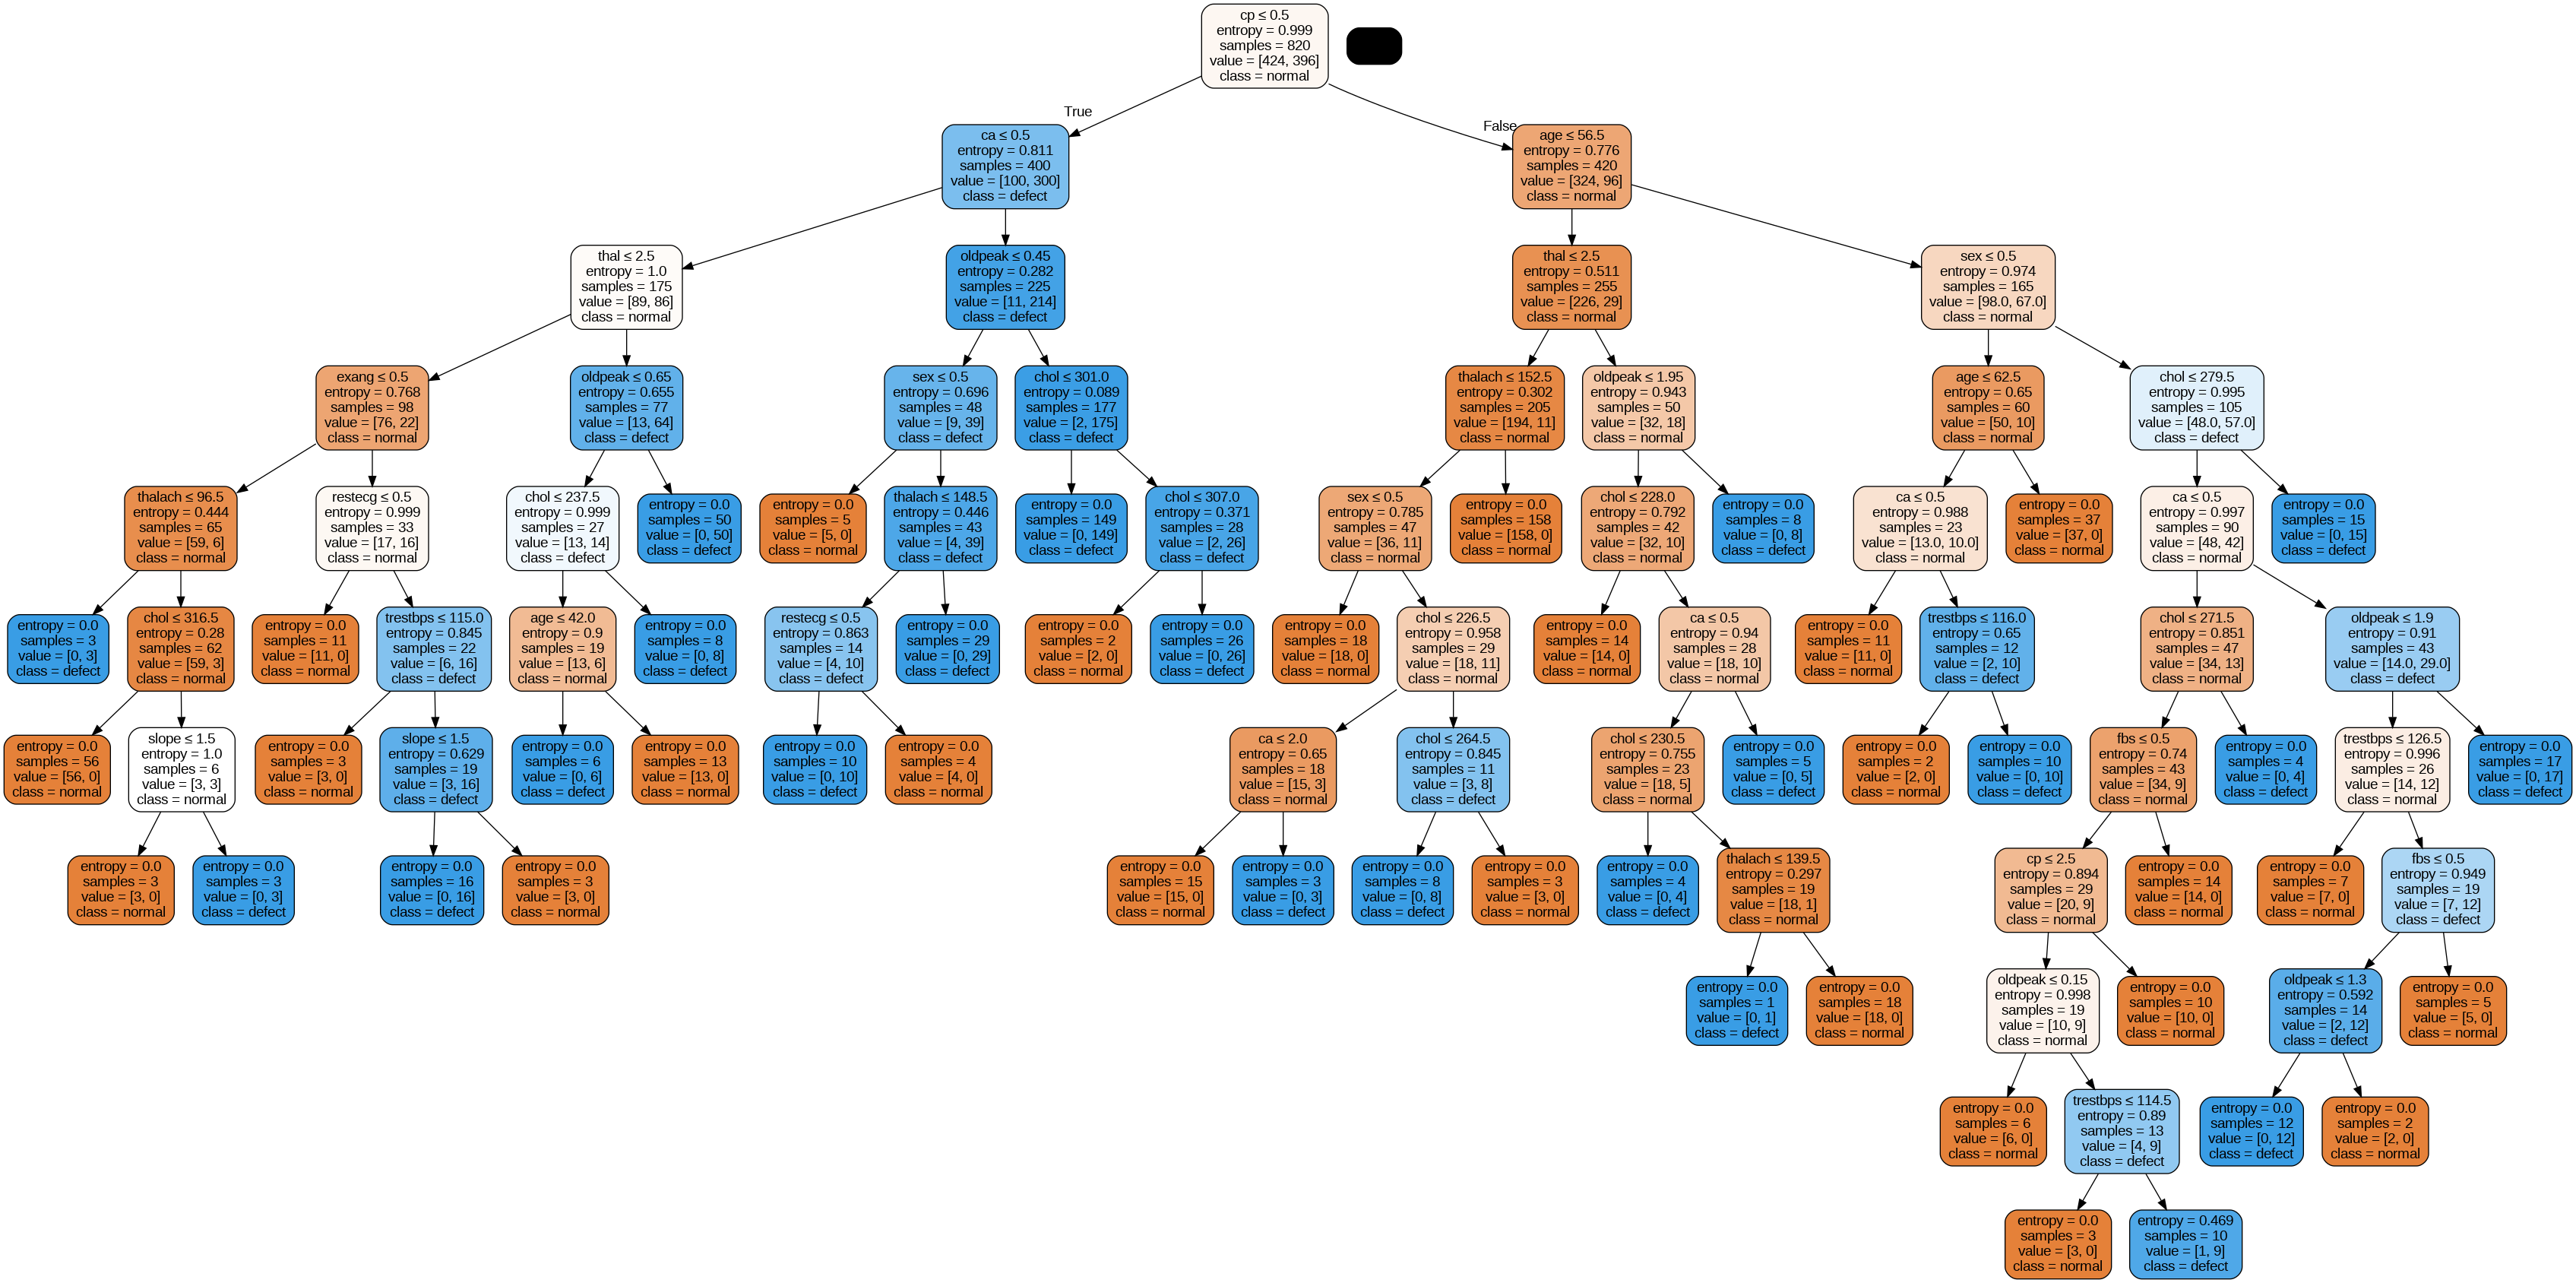

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=random_state)
gini_model.fit(train_x, train_y)
y_pred = gini_model.predict(test_x)
y_pred = pd.Series(y_pred)

In [ ]:
print("Model Entropy - max depth 10")
print("Accuracy:", metrics.accuracy_score(test_y,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(test_y,y_pred))
print('Precision score for "defect"' , metrics.precision_score(test_y,y_pred, pos_label = "defect"))
print('Precision score for "normal"' , metrics.precision_score(test_y,y_pred, pos_label = "normal"))
print('Recall score for "defect"' , metrics.recall_score(test_y,y_pred, pos_label = "defect"))
print('Recall score for "normal"' , metrics.recall_score(test_y,y_pred, pos_label= "normal"))

Model Entropy - max depth 10
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score for "defect" 1.0
Precision score for "normal" 1.0
Recall score for "defect" 1.0
Recall score for "normal" 1.0


In [ ]:
dot_data=StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=train_x.columns,
                class_names = ["normal", "defect"])

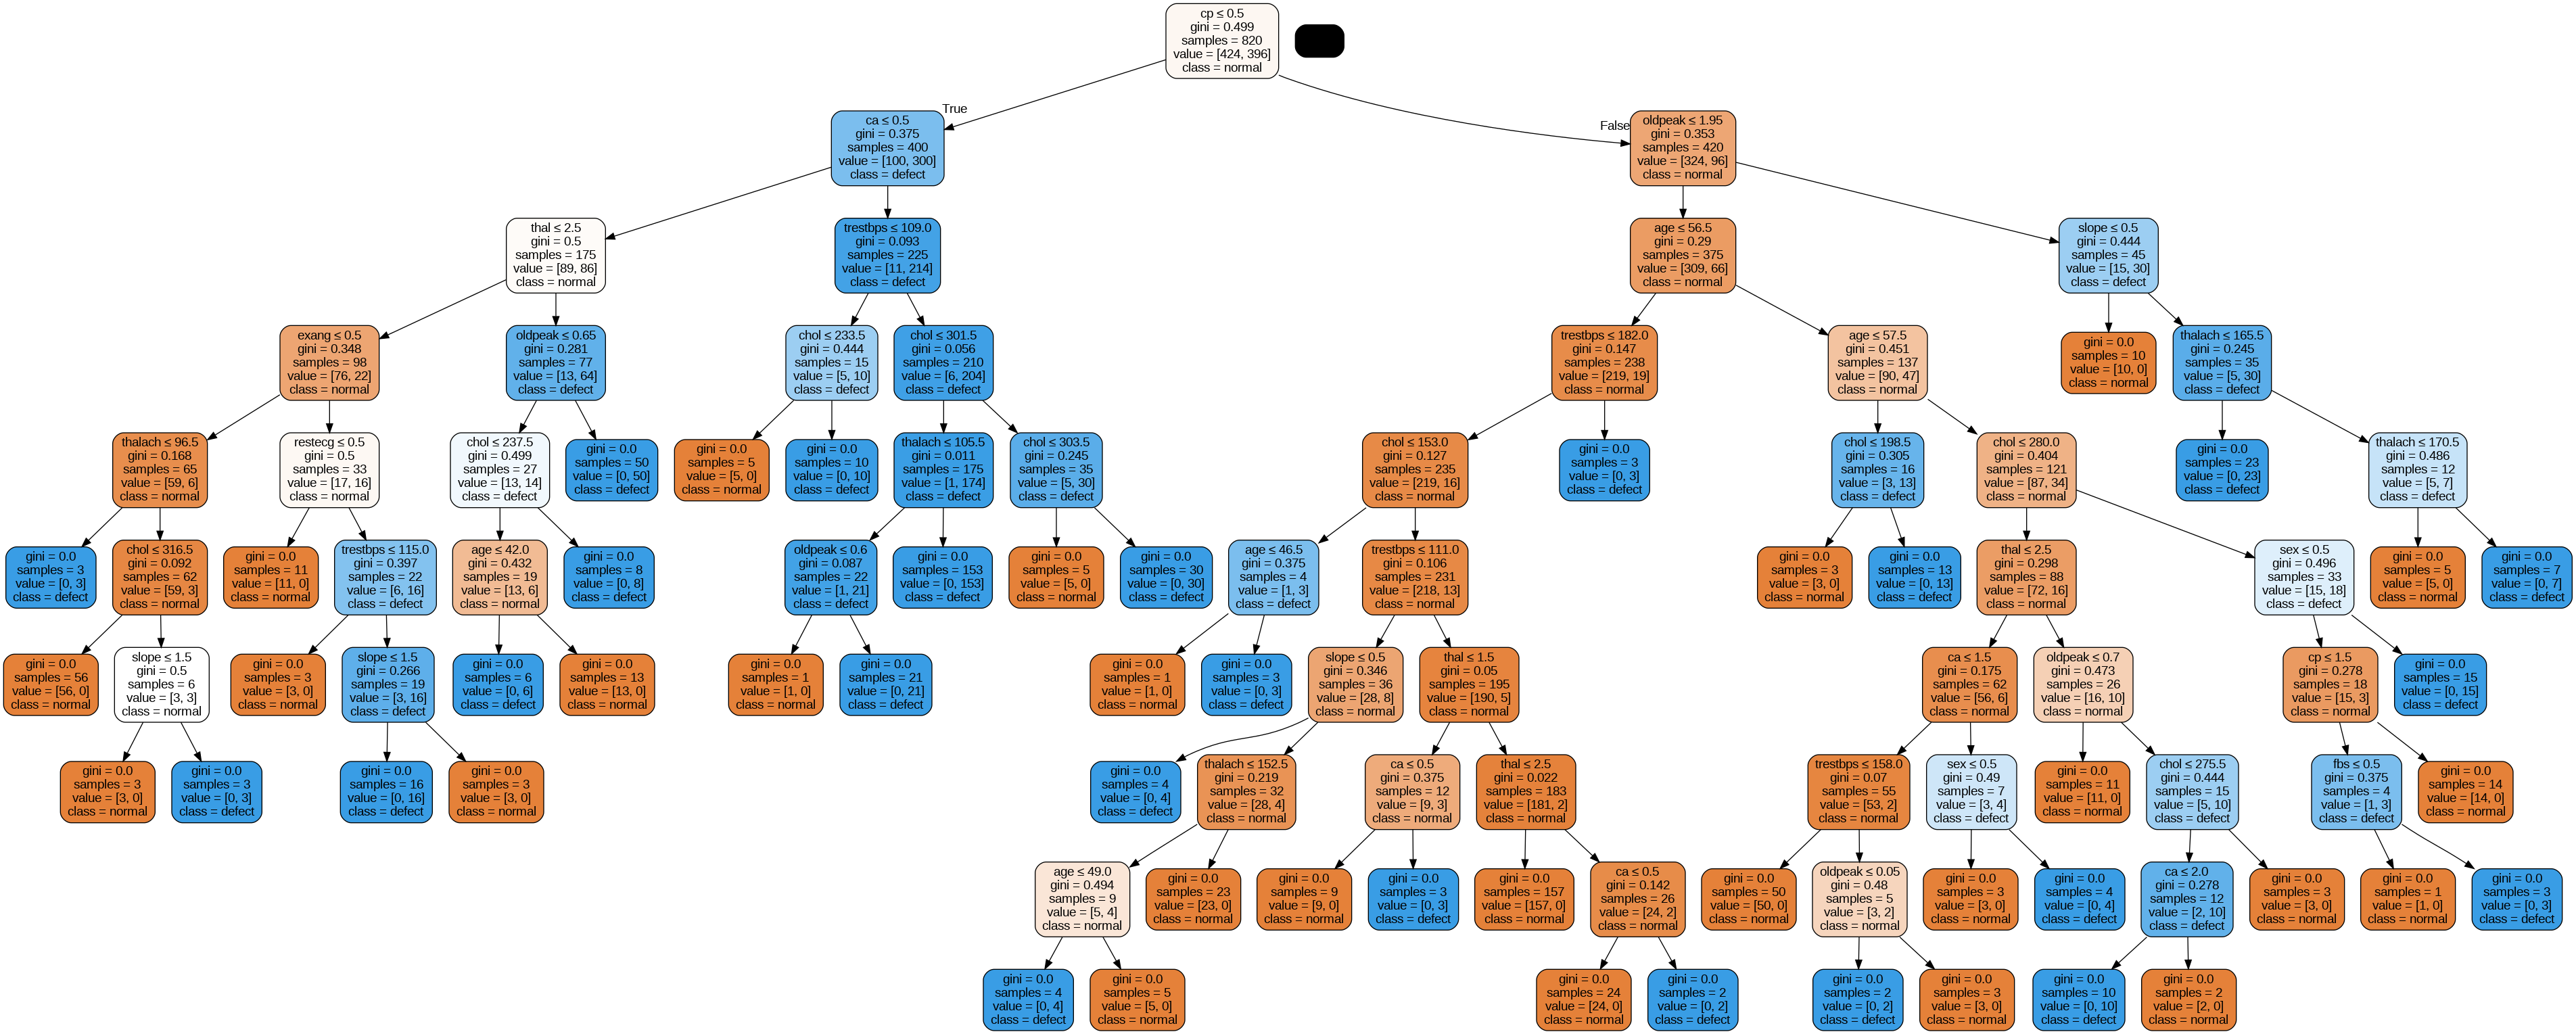

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())